# Relatorio de Análise VIII

## Identificando e Removendo Outliers

In [93]:
%matplotlib inline

In [94]:
import pandas as pd

In [95]:
import matplotlib.pyplot as plt

In [96]:
plt.rc('figure', figsize = (8, 3))

In [97]:
valor = dados['Valor']

In [98]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep= ';')

<img src='dados/Box-Plot.png' width=70%>

In [99]:
grupo_tipo = dados.groupby('Tipo')

In [100]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [101]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

dados_new = dados[selecao]

<AxesSubplot:>

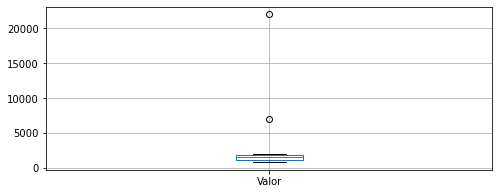

In [102]:
dados.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

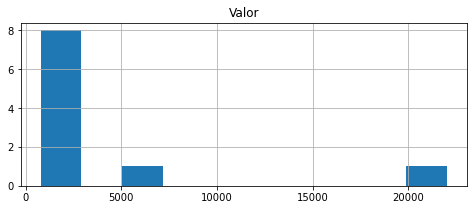

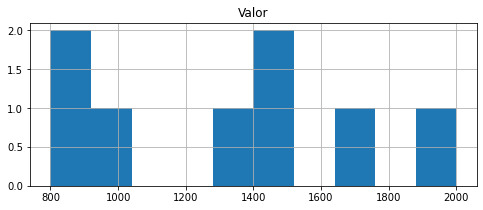

In [103]:
dados.hist(['Valor'])

dados_new.hist(['Valor'])

In [104]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [105]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

dados_new = dados[selecao]

<AxesSubplot:>

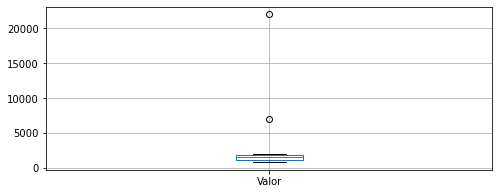

In [106]:
dados.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

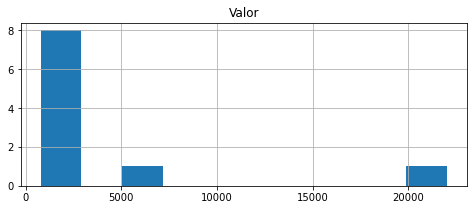

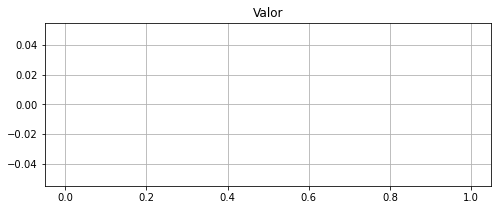

In [107]:
dados.hist(['Valor'])

dados_new.hist(['Valor'])

<AxesSubplot:>

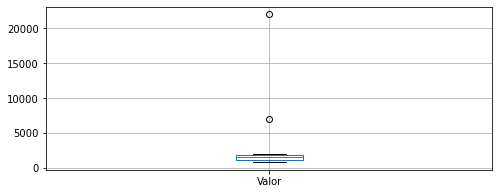

In [108]:
dados.boxplot(['Valor'])

In [109]:
grupo_tipo = dados.groupby('Tipo')

In [110]:
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [111]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9], 'Casa': [1], 'Casa de Condomínio': [5, 6], 'Quitinete': [0]}

In [112]:
Q1

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,1.00,0.0,0.00,42.00,925.0,323.25,14.75,17.8600
Casa,2.00,0.0,1.00,100.00,7000.0,0.00,0.00,70.0000
Casa de Condomínio,2.75,2.5,1.25,236.25,6250.0,0.00,0.00,18.8675
Quitinete,1.00,0.0,0.00,40.00,1700.0,500.00,60.00,42.5000


In [113]:
Q3

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,2.00,0.75,0.75,65.00,1500.0,534.5,42.5,44.0000
Casa,2.00,0.00,1.00,100.00,7000.0,0.0,0.0,70.0000
Casa de Condomínio,4.25,3.50,3.75,578.75,16750.0,0.0,0.0,25.8425
Quitinete,1.00,0.00,0.00,40.00,1700.0,500.0,60.0,42.5000


In [114]:
limite_inferior

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,-0.5,-1.125,-1.125,7.5,62.5,6.375,-26.875,-21.350
Casa,2.0,0.000,1.000,100.0,7000.0,0.000,0.000,70.000
Casa de Condomínio,0.5,1.000,-2.500,-277.5,-9500.0,0.000,0.000,8.405
Quitinete,1.0,0.000,0.000,40.0,1700.0,500.000,60.000,42.500


In [115]:
limite_superior

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2
Tipo,,,,,,,,
Apartamento,3.5,1.875,1.875,99.5,2362.5,851.375,84.125,83.210
Casa,2.0,0.000,1.000,100.0,7000.0,0.000,0.000,70.000
Casa de Condomínio,6.5,5.000,7.500,1092.5,32500.0,0.000,0.000,36.305
Quitinete,1.0,0.000,0.000,40.0,1700.0,500.000,60.000,42.500


In [126]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dado_new, dados_selecao])
  
  
  
  
  
  

KeyError: 'Apartamento'

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

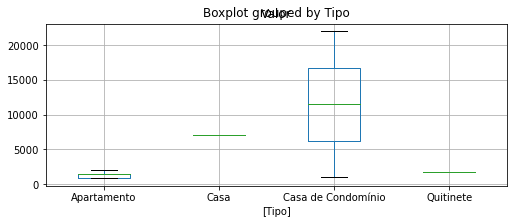

In [118]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [130]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

In [129]:
#dados_new.boxplot(['Valor'], by = ['Tipo'])